In [1]:
from init import *

In [12]:
number_of_states = 8
start_value = 0
drift = 0
diffusion = 1

model = Model()
model.TimeStart = 0
model.TimeSteps = 100
model.NumPaths = 1
model.MemoryLimitKB = 100
model.updaters.append(Updater(
    name = "IndependentGaussian"
))
for i in range(number_of_states):
    model.updaters.append(Updater(
        name = "BrownianMotion",
        start = start_value,
        args = [drift,diffusion]
    ))

In [13]:
dt = 1
for i in range(model.TimeSteps):
    model.evaluations.append(EvaluationPoint(0,model.TimeStart+(i+1)*dt))

In [14]:
reply = requests.post(f'{server}/model',model.json())
results = EvaluationResults(reply.json(),model)
results

8 states with 100 evaluations

In [15]:
results.df().head()

,name,title,state,time,step,npaths,mean,mean_error,stddev,skewness
0,BrownianMotion,,0,1.0,1,1,0.164284,None,None,None
1,BrownianMotion,,1,1.0,1,1,-0.786659,None,None,None
2,BrownianMotion,,2,1.0,1,1,-0.133823,None,None,None
3,BrownianMotion,,3,1.0,1,1,0.433213,None,None,None
4,BrownianMotion,,4,1.0,1,1,2.097131,None,None,None


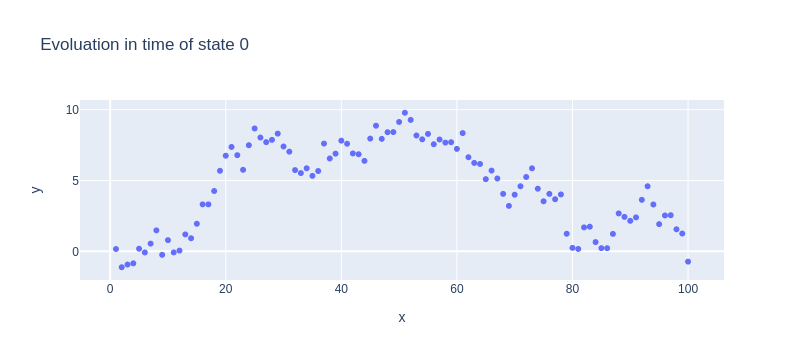

In [16]:
import plotly.express as px
state = 0
fig = px.scatter (
    title = f'Evoluation in time of state {state}',
    x = results.time_points,
    y = [
            results.GetStateEvaluationResult(state,i).mean
            for i in range(results.NumEvaluations())
        ]
)
fig.show()

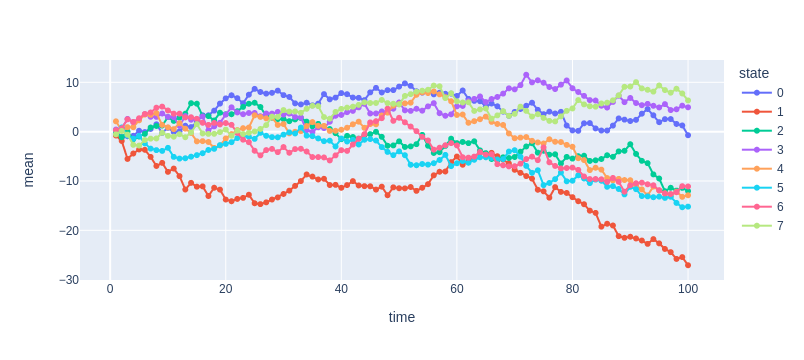

In [17]:
px.line(results.df(), x="time", y="mean", color='state',markers=True)